In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

# Step 1 : 데이터 만들기

In [2]:
N = 20
random_0 = torch.randn(int(N/2), 1)
random_5 = torch.randn(int(N/2), 1) + 5

cl1_data = torch.hstack([random_0, random_5])
cl2_data = torch.hstack([random_5, random_0])

cl1_label = torch.ones(int(N/2), 1)
cl2_label = torch.zeros(int(N/2), 1)
X = torch.vstack([cl1_data, cl2_data])
y = torch.vstack([cl1_label, cl2_label])

Text(0, 0.5, 'x2')

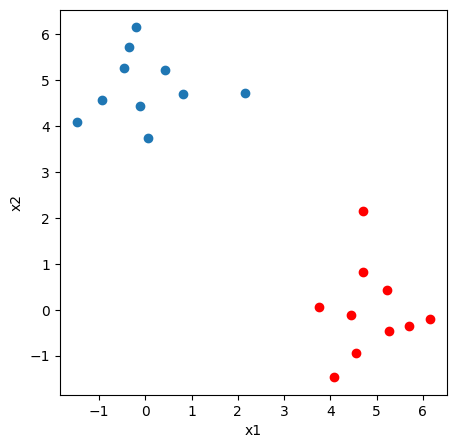

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(cl1_data[:, 0], cl1_data[:, 1], "o")
ax.plot(cl2_data[:, 0], cl2_data[:, 1], "ro")
ax.set_xlabel("x1")
ax.set_ylabel("x2")


# Step 2 : 모델 만들기

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        self.linear = nn.Sequential(
            nn.Linear(2, 100),
            nn.Sigmoid(),
            nn.Linear(100, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = MLP()
print(model)
print(model(torch.randn(5, 2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


# Step 3 : 모델 학습시키기

In [5]:
LR = 1e-1
EPOCH = 100

optimizer = optim.SGD(model.parameters(), lr=LR)

loss_hist = []
model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = F.binary_cross_entropy(y_hat, y)
    # update
    optimizer.zero_grad()  # 초기화
    loss.backward()  # backpropagation
    optimizer.step()  # weight update
    # print loss
    loss_hist.append(loss.item())    
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(), 3)}")
    print("-"*30)
    if 1e-3 > loss.item():
        break
    
    

Epoch: 1, train loss: 0.737
------------------------------
Epoch: 2, train loss: 0.58
------------------------------
Epoch: 3, train loss: 0.473
------------------------------
Epoch: 4, train loss: 0.396
------------------------------
Epoch: 5, train loss: 0.339
------------------------------
Epoch: 6, train loss: 0.294
------------------------------
Epoch: 7, train loss: 0.259
------------------------------
Epoch: 8, train loss: 0.232
------------------------------
Epoch: 9, train loss: 0.209
------------------------------
Epoch: 10, train loss: 0.19
------------------------------
Epoch: 11, train loss: 0.174
------------------------------
Epoch: 12, train loss: 0.161
------------------------------
Epoch: 13, train loss: 0.149
------------------------------
Epoch: 14, train loss: 0.139
------------------------------
Epoch: 15, train loss: 0.13
------------------------------
Epoch: 16, train loss: 0.123
------------------------------
Epoch: 17, train loss: 0.116
-----------------------

In [6]:
print(F.binary_cross_entropy(y_hat, y))
print(-F.torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(0.0204, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0204, grad_fn=<DivBackward0>)


Text(0, 0.5, 'Loss')

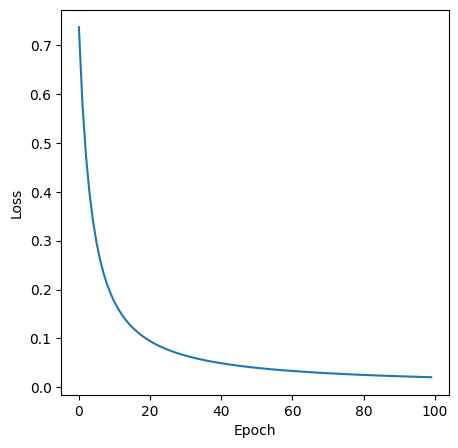

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(loss_hist)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

# STEP 4 : 모델 테스트하기

In [8]:
x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)

X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval()  # test 모드로 전환
# print(model.training)
with torch.no_grad():
    y_hat = model(X_test)

Y_hat = y_hat.squeeze()

/home/shyeon/.pyenv/versions/3.11.3/envs/pytorch/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


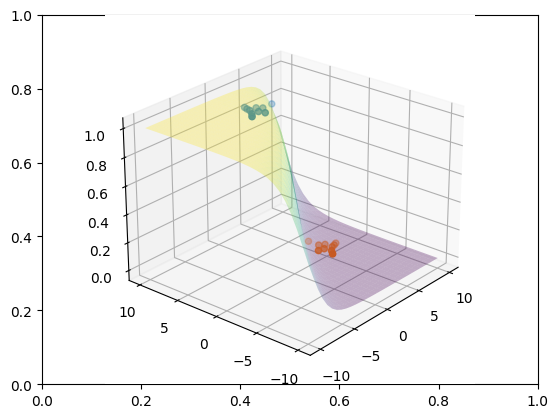

In [9]:
ax = plt.axes(projection = '3d')
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat, cmap="viridis", alpha=0.3)
ax.scatter3D(cl1_data[:, 0], cl1_data[:, 1], cl1_label)
ax.scatter3D(cl2_data[:, 0], cl2_data[:, 1], cl2_label)